In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
clustdata= pd.read_csv('clustering.csv')

In [6]:
clustdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25877 entries, 0 to 25876
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      25877 non-null  object 
 1   CO      25856 non-null  float64
 2   NO2     25858 non-null  float64
 3   O3      25858 non-null  float64
 4   SO2     25856 non-null  float64
 5   PM10    25858 non-null  float64
 6   PM2.5   25858 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.4+ MB


In [8]:
clustdata.isna().sum()

ds        0
CO       21
NO2      19
O3       19
SO2      21
PM10     19
PM2.5    19
dtype: int64

In [10]:
clustdata.dropna(inplace=True)
clustdata.isna().sum()

ds       0
CO       0
NO2      0
O3       0
SO2      0
PM10     0
PM2.5    0
dtype: int64

In [12]:
clustdata

,ds,CO,NO2,O3,SO2,PM10,PM2.5
0,01-01-2017 12:00,1.2,0.059,0.002,0.004,73.0,57.0
1,01-01-2017 01:00,1.2,0.058,0.002,0.004,71.0,59.0
2,01-01-2017 02:00,1.2,0.056,0.002,0.004,70.0,59.0
3,01-01-2017 03:00,1.2,0.056,0.002,0.004,70.0,58.0
4,01-01-2017 04:00,1.2,0.051,0.002,0.003,69.0,61.0
...,...,...,...,...,...,...,...
25872,12/31/19 19:00,0.5,0.026,0.014,0.003,26.0,19.0
25873,12/31/19 20:00,0.4,0.024,0.014,0.003,27.0,19.0
25874,12/31/19 21:00,0.4,0.014,0.021,0.003,23.0,18.0
25875,12/31/19 22:00,0.5,0.022,0.014,0.003,20.0,19.0


In [14]:
clustdata['ds'] = pd.to_datetime(clustdata['ds'], format='mixed')

In [15]:
clustdata

,ds,CO,NO2,O3,SO2,PM10,PM2.5
0,2017-01-01 12:00:00,1.2,0.059,0.002,0.004,73.0,57.0
1,2017-01-01 01:00:00,1.2,0.058,0.002,0.004,71.0,59.0
2,2017-01-01 02:00:00,1.2,0.056,0.002,0.004,70.0,59.0
3,2017-01-01 03:00:00,1.2,0.056,0.002,0.004,70.0,58.0
4,2017-01-01 04:00:00,1.2,0.051,0.002,0.003,69.0,61.0
...,...,...,...,...,...,...,...
25872,2019-12-31 19:00:00,0.5,0.026,0.014,0.003,26.0,19.0
25873,2019-12-31 20:00:00,0.4,0.024,0.014,0.003,27.0,19.0
25874,2019-12-31 21:00:00,0.4,0.014,0.021,0.003,23.0,18.0
25875,2019-12-31 22:00:00,0.5,0.022,0.014,0.003,20.0,19.0


In [16]:
clustdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25855 entries, 0 to 25876
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      25855 non-null  datetime64[ns]
 1   CO      25855 non-null  float64       
 2   NO2     25855 non-null  float64       
 3   O3      25855 non-null  float64       
 4   SO2     25855 non-null  float64       
 5   PM10    25855 non-null  float64       
 6   PM2.5   25855 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.6 MB


In [17]:
# Converting CO, NO2, O3, SO2 from ppm to µg/m³

clustdata['CO'] = clustdata['CO'] * 28 * (1000 / 22.41)
clustdata['NO2'] = clustdata['NO2'] * 46 * (1000 / 22.41)
clustdata['O3'] = clustdata['O3'] * 43 * (1000 / 22.41)
clustdata['SO2'] = clustdata['SO2'] * 64 * (1000 / 22.41)

In [22]:
clustdata

,ds,CO,NO2,O3,SO2,PM10,PM2.5
0,2017-01-01 12:00:00,1499.330656,121.106649,3.837573,11.423472,73.0,57.0
1,2017-01-01 01:00:00,1499.330656,119.053994,3.837573,11.423472,71.0,59.0
2,2017-01-01 02:00:00,1499.330656,114.948684,3.837573,11.423472,70.0,59.0
3,2017-01-01 03:00:00,1499.330656,114.948684,3.837573,11.423472,70.0,58.0
4,2017-01-01 04:00:00,1499.330656,104.685408,3.837573,8.567604,69.0,61.0
...,...,...,...,...,...,...,...
25872,2019-12-31 19:00:00,624.721107,53.369032,26.863008,8.567604,26.0,19.0
25873,2019-12-31 20:00:00,499.776885,49.263722,26.863008,8.567604,27.0,19.0
25874,2019-12-31 21:00:00,499.776885,28.737171,40.294511,8.567604,23.0,18.0
25875,2019-12-31 22:00:00,624.721107,45.158411,26.863008,8.567604,20.0,19.0


In [24]:
fts = clustdata[['CO', 'NO2', 'O3', 'SO2', 'PM10', 'PM2.5']]
scaler = StandardScaler()
scaled_dta = scaler.fit_transform(fts)

In [26]:
scaled_dta

array([[ 1.85134119,  1.64832003, -1.18505934, -0.10554713,  1.27580956,
         1.70540678],
       [ 1.85134119,  1.58804274, -1.18505934, -0.10554713,  1.20282639,
         1.80541663],
       [ 1.85134119,  1.46748815, -1.18505934, -0.10554713,  1.16633481,
         1.80541663],
       ...,
       [-0.54721198, -1.06415831, -0.19040466, -0.40486941, -0.54876962,
        -0.24478527],
       [-0.24739283, -0.58193994, -0.55685638, -0.40486941, -0.65824438,
        -0.19478035],
       [-0.24739283,  0.20166492, -1.0280086 , -0.10554713, -0.65824438,
        -0.39480005]])

In [28]:
clustdata_scaled = pd.DataFrame(scaled_dta, columns=fts.columns)
clustdata_scaled['ds'] = clustdata['ds']

In [30]:
clustdata_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25855 entries, 0 to 25854
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   CO      25855 non-null  float64       
 1   NO2     25855 non-null  float64       
 2   O3      25855 non-null  float64       
 3   SO2     25855 non-null  float64       
 4   PM10    25855 non-null  float64       
 5   PM2.5   25855 non-null  float64       
 6   ds      25833 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


In [32]:
clustdata_daily = clustdata_scaled.groupby(clustdata_scaled['ds'].dt.date).mean()

In [34]:
X = clustdata_daily[['CO', 'NO2', 'O3', 'SO2', 'PM10', 'PM2.5']]

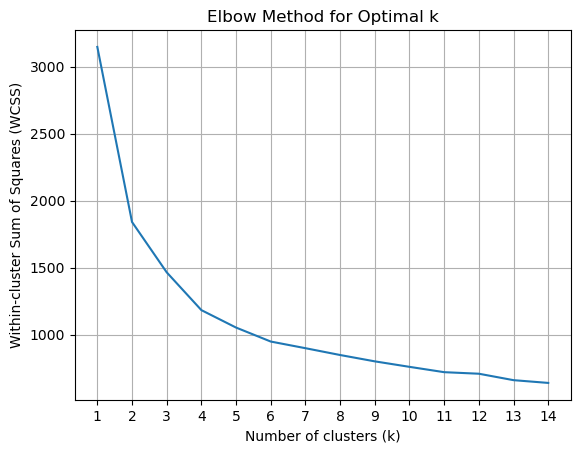

In [36]:
wcss = []
range = range(1, 15)

for k in range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range, wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.xticks(range)
plt.grid()
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [40]:
clustdata_daily['Cluster'] = kmeans.labels_
clustdata_daily

,CO,NO2,O3,SO2,PM10,PM2.5,ds,Cluster
ds,,,,,,,,
2017-01-01,1.339150,1.362003,-1.126165,-0.043188,1.592070,2.220041,2017-01-01 12:00:00,1
2017-01-02,1.314165,0.879785,-0.432525,0.131416,2.705063,3.213889,2017-01-02 11:30:00,1
2017-01-03,0.752004,0.909923,-0.563400,0.143888,1.272769,1.447048,2017-01-03 11:30:00,1
2017-01-04,1.226718,1.598089,-0.831695,0.306021,0.477556,0.601131,2017-01-04 11:30:00,2
2017-01-05,0.114889,0.583421,-0.713907,-0.005773,-0.115432,-0.046849,2017-01-05 11:30:00,2
...,...,...,...,...,...,...,...,...
2019-12-27,0.589602,0.930016,-1.043277,-0.018245,0.174980,0.330271,2019-12-27 11:30:00,2
2019-12-28,0.414708,0.445286,-0.888408,-0.142962,0.322467,0.401112,2019-12-28 11:30:00,2
2019-12-29,0.364738,0.209200,-0.820789,-0.305095,0.051821,0.305269,2019-12-29 11:30:00,2


<Axes: xlabel='ds', ylabel='CO'>

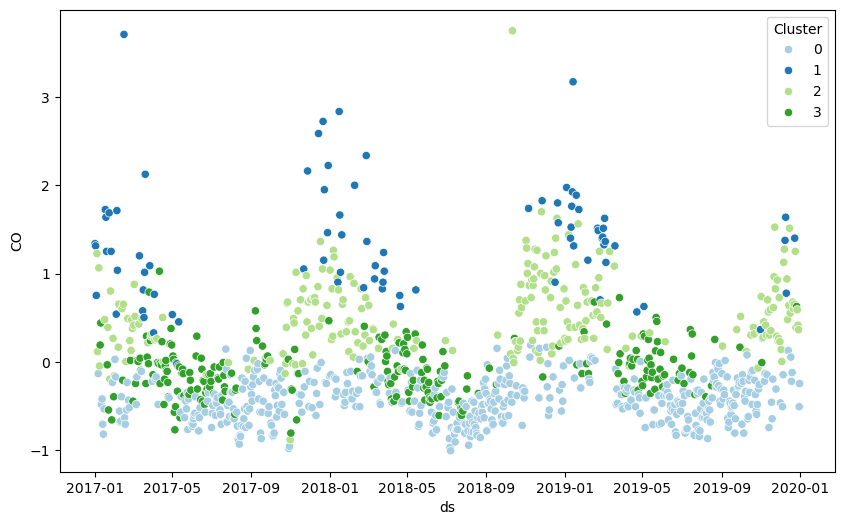

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ds', y='CO', hue='Cluster', data=clustdata_daily, palette='Paired')

<Axes: xlabel='ds', ylabel='NO2'>

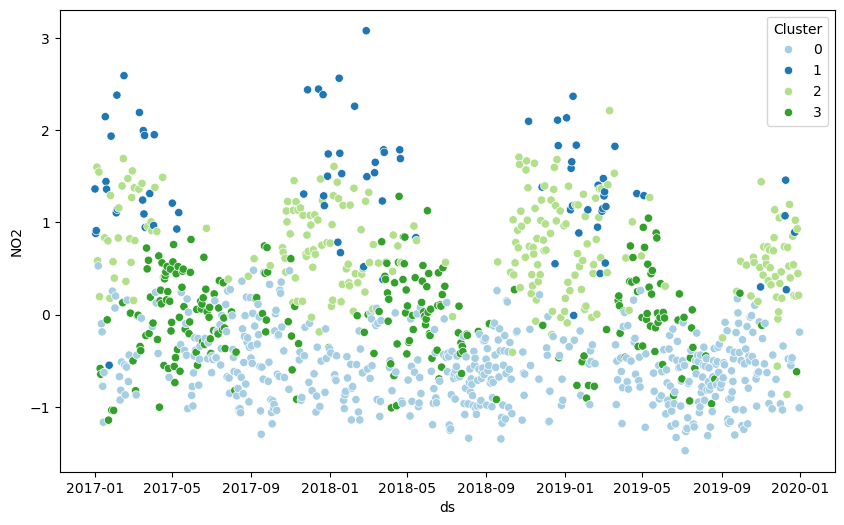

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ds', y='NO2', hue='Cluster', data=clustdata_daily, palette='Paired')

<Axes: xlabel='ds', ylabel='O3'>

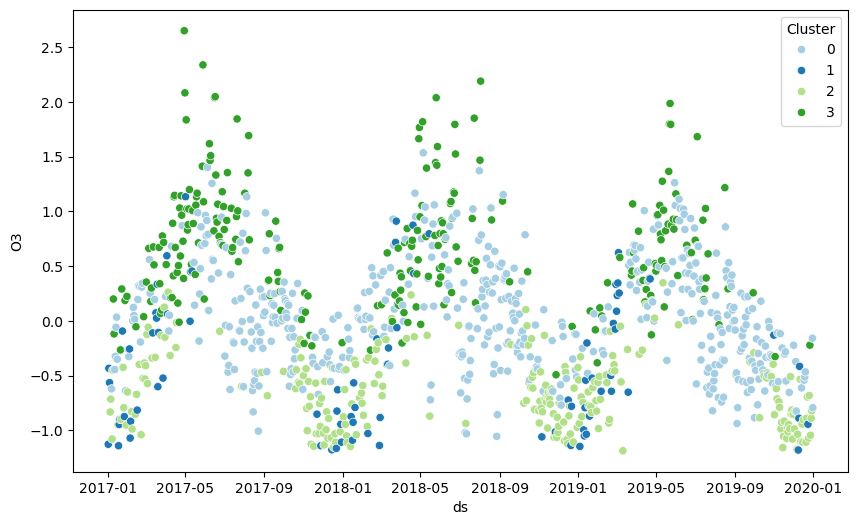

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ds', y='O3', hue='Cluster', data=clustdata_daily, palette='Paired')

<Axes: xlabel='ds', ylabel='SO2'>

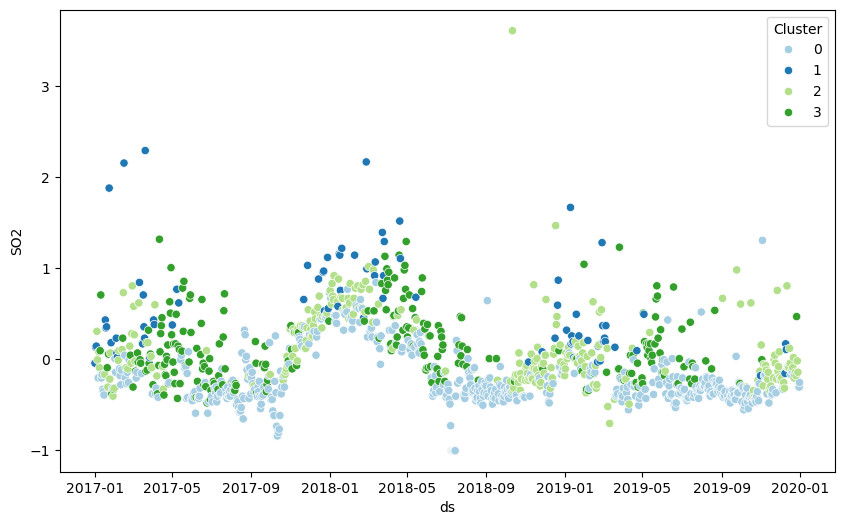

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ds', y='SO2', hue='Cluster', data=clustdata_daily, palette='Paired')

<Axes: xlabel='ds', ylabel='PM2.5'>

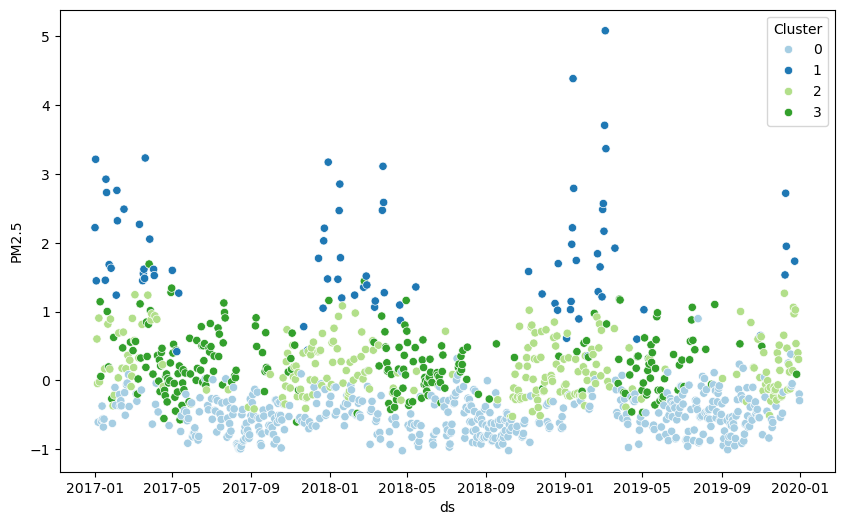

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ds', y='PM2.5', hue='Cluster', data=clustdata_daily, palette='Paired')

<Axes: xlabel='ds', ylabel='PM10'>

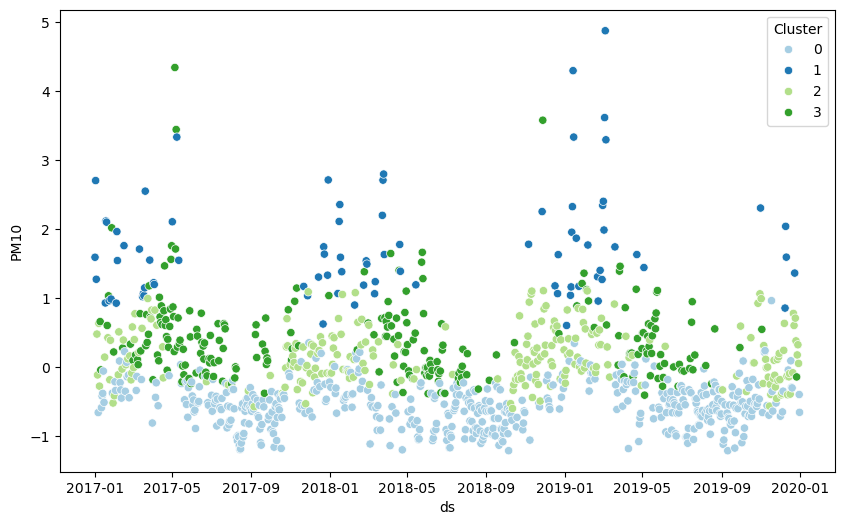

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ds', y='PM10', hue='Cluster', data=clustdata_daily, palette='Paired')